In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('Superstore.csv', encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
cols_to_drop = [col for col in ['Row ID', 'Customer ID', 'Order ID', 'Postal Code', 'Product ID'] if col in df.columns]
df = df.drop(columns=cols_to_drop)

In [6]:
df.duplicated().sum()

1

In [7]:
df = df.drop_duplicates()

In [8]:
df.isnull().sum()

Order Date       0
Ship Date        0
Ship Mode        0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [9]:
df.dtypes

Order Date        object
Ship Date         object
Ship Mode         object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Region            object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [10]:
categorical_cols = df.select_dtypes(include='object').columns

In [11]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [12]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000
mean,229.852846,3.789753,0.156188,28.660971
std,623.276074,2.225149,0.206457,234.271476
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.731000
50%,54.480000,3.000000,0.200000,8.671000
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


# Summary
####    After generating descriptive statistics and previewing the dataset, it was observed that the Superstore data is mostly clean and well-     structured.
####     All key numerical variables such as Sales, Quantity, Discount, and Profit have valid values, although some extreme profits and losses suggest the presence of outliers.
####      There are no missing values in the dataset, and all data types were correctly formatted after converting Order Date and Ship Date to datetime type.
####     A few duplicate rows were found and removed to maintain accuracy.
####    Overall, the dataset appears reliable, but further investigation into the outliers and unusually high discounts will be performed during data cleaning.

In [15]:
df.isnull().sum()

(df.isnull().mean() * 100).round(2)


Order Date       0.0
Ship Date        0.0
Ship Mode        0.0
Customer Name    0.0
Segment          0.0
Country          0.0
City             0.0
State            0.0
Region           0.0
Category         0.0
Sub-Category     0.0
Product Name     0.0
Sales            0.0
Quantity         0.0
Discount         0.0
Profit           0.0
dtype: float64

In [16]:
!pip install missingno

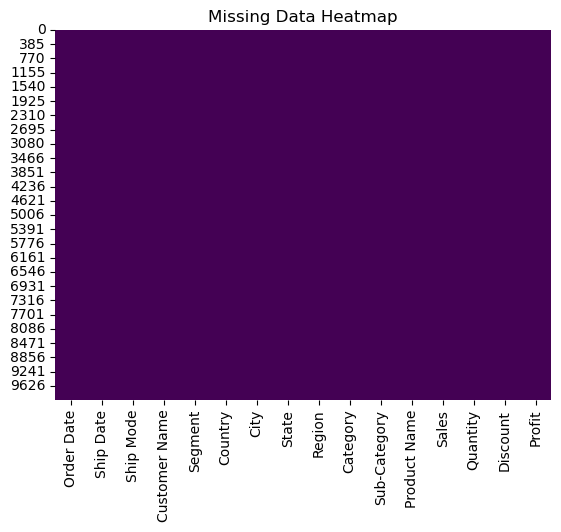

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno


sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

<Axes: xlabel='Category', ylabel='Sales'>

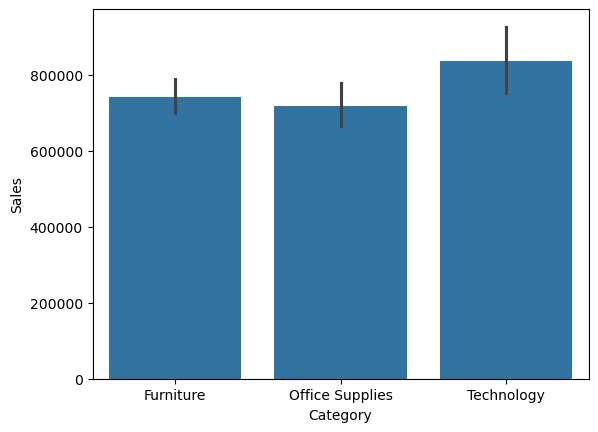

In [19]:
sns.barplot(x='Category', y='Sales', data=df, estimator=sum)

<Axes: title={'center': 'Top 10 Sub-Categories by Total Sales'}, ylabel='Sub-Category'>

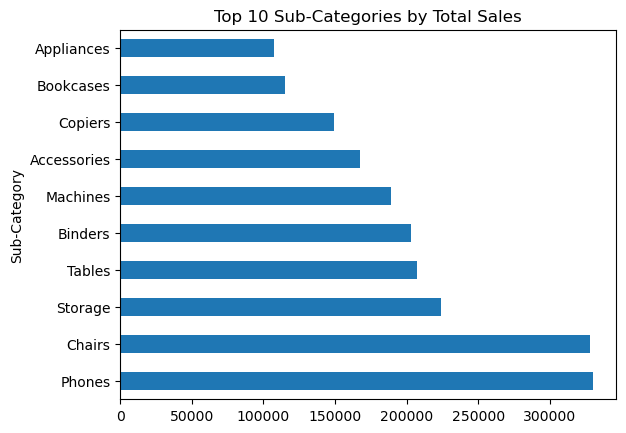

In [20]:
top_sub = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)
top_sub.plot(kind='barh', title='Top 10 Sub-Categories by Total Sales')

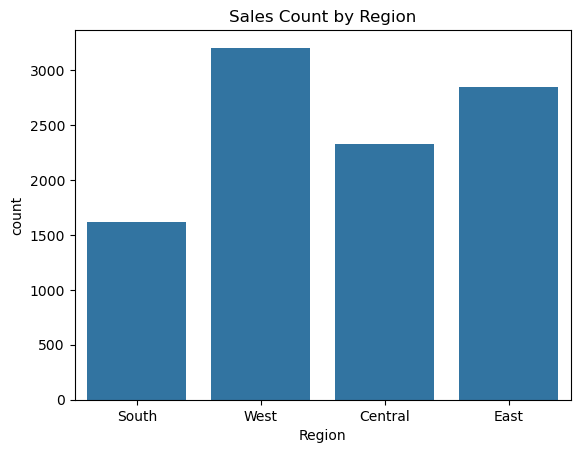

In [21]:
sns.countplot(x='Region', data=df)
plt.title("Sales Count by Region")
plt.show()

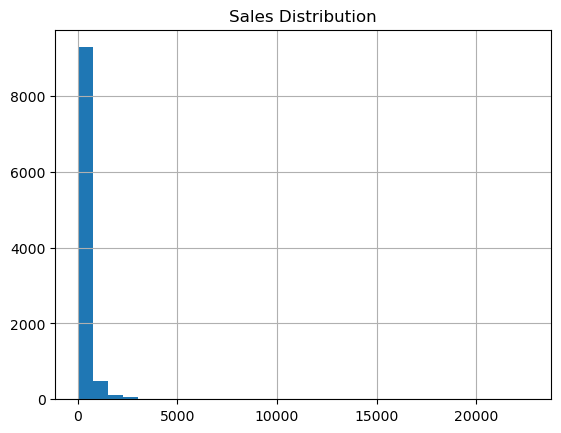

In [22]:
df['Sales'].hist(bins=30)
plt.title("Sales Distribution")
plt.show()

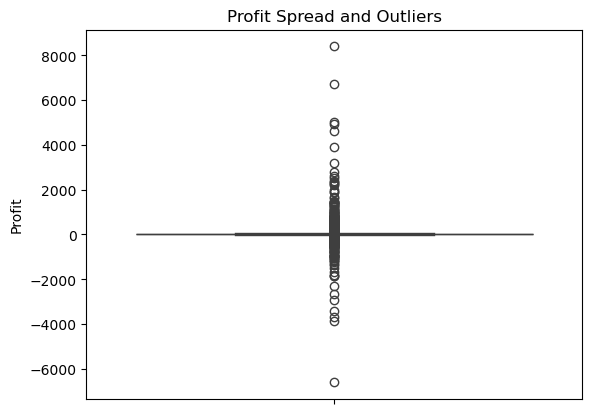

In [23]:
sns.boxplot(y='Profit', data=df)
plt.title("Profit Spread and Outliers")
plt.show()

In [24]:
mean_values = df[['Sales', 'Profit', 'Discount', 'Quantity']].mean()
median_values = df[['Sales', 'Profit', 'Discount', 'Quantity']].median()
mode_values = df[['Sales', 'Profit', 'Discount', 'Quantity']].mode().iloc[0]

In [25]:
std_values = df[['Sales', 'Profit', 'Discount', 'Quantity']].std()
var_values = df[['Sales', 'Profit', 'Discount', 'Quantity']].var()
range_values = df[['Sales', 'Profit', 'Discount', 'Quantity']].max() - df[['Sales', 'Profit', 'Discount', 'Quantity']].min()
iqr_values = df[['Sales', 'Profit', 'Discount', 'Quantity']].quantile(0.75) - df[['Sales', 'Profit', 'Discount', 'Quantity']].quantile(0.25)

In [26]:
skewness = df[['Sales', 'Profit', 'Discount', 'Quantity']].skew()
kurtosis = df[['Sales', 'Profit', 'Discount', 'Quantity']].kurt()

In [27]:
summary_stats = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values,
    'Std Dev': std_values,
    'Variance': var_values,
    'Range': range_values,
    'IQR': iqr_values,
    'Skewness': skewness,
    'Kurtosis': kurtosis
})
print("📊 Summary Statistics:")
display(summary_stats.round(3))

📊 Summary Statistics:


,Mean,Median,Mode,Std Dev,Variance,Range,IQR,Skewness,Kurtosis
Sales,229.853,54.480,12.96,623.276,388473.064,22638.036,192.660,12.972,305.282
Profit,28.661,8.671,0.00,234.271,54883.124,14999.954,27.633,7.561,397.150
Discount,0.156,0.200,0.00,0.206,0.043,0.800,0.200,1.685,2.410
Quantity,3.790,3.000,3.00,2.225,4.951,13.000,3.000,1.278,1.992


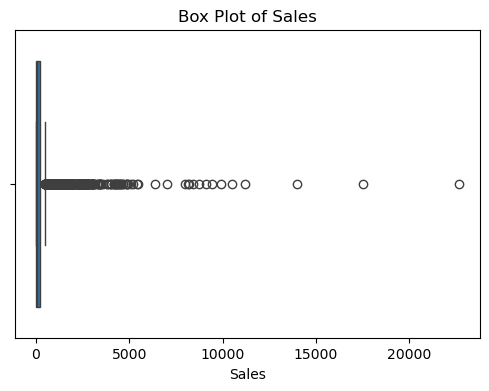

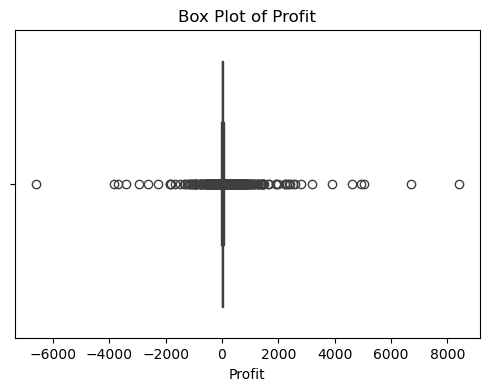

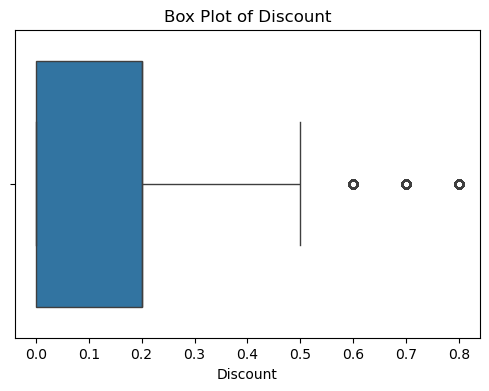

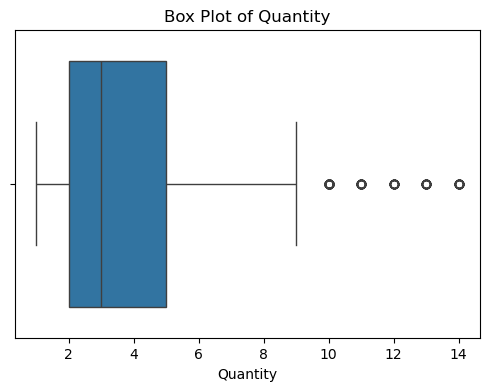

In [28]:
for col in ['Sales', 'Profit', 'Discount', 'Quantity']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot of {col}')
    plt.show()

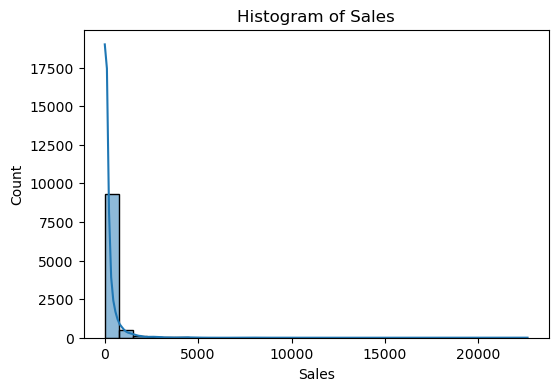

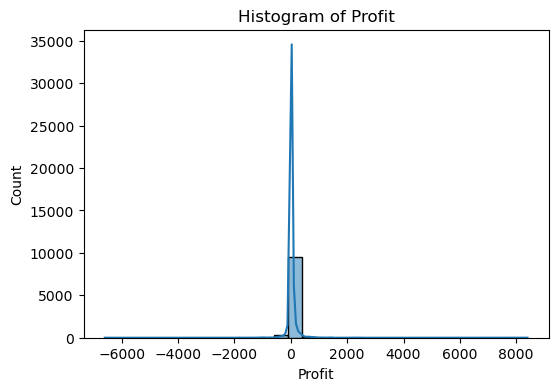

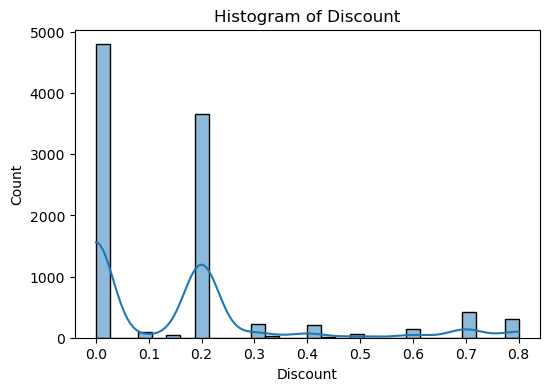

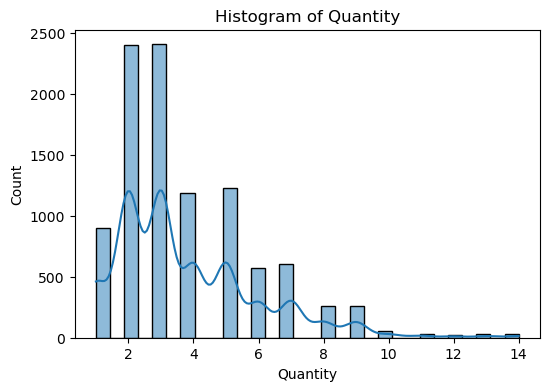

In [29]:
for col in ['Sales', 'Profit', 'Discount', 'Quantity']:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.show()

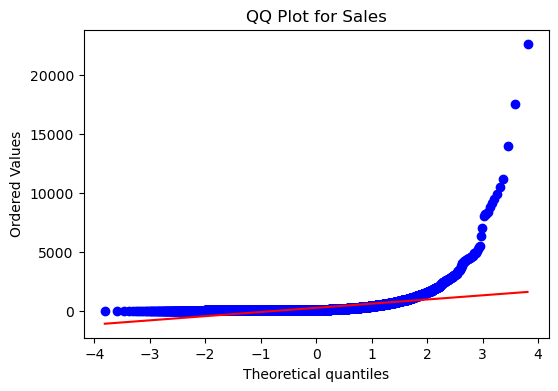

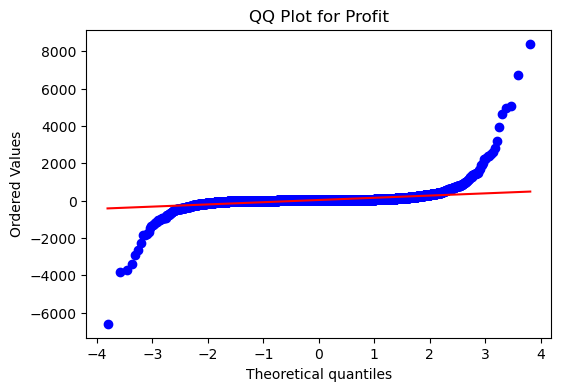

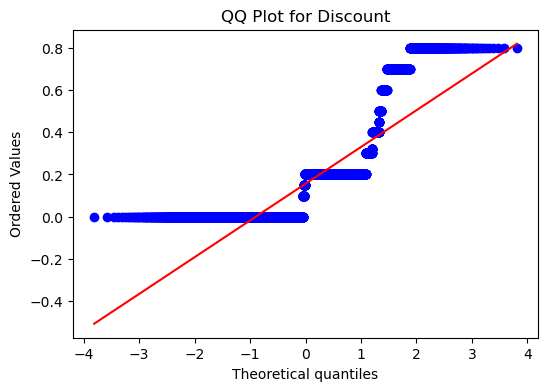

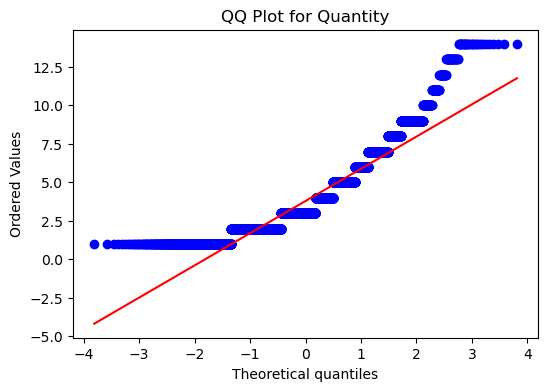

In [30]:
import scipy.stats as stats
for col in ['Sales', 'Profit', 'Discount', 'Quantity']:
    plt.figure(figsize=(6, 4))
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'QQ Plot for {col}')
    plt.show()

In [31]:
z_scores = np.abs(stats.zscore(df[['Sales', 'Profit', 'Discount', 'Quantity']]))
outliers_z = (z_scores > 3).sum()
print("\n🔍 Outliers detected using Z-Score method (>|3|):")
print(outliers_z)

# b. IQR method
Q1 = df[['Sales', 'Profit', 'Discount', 'Quantity']].quantile(0.25)
Q3 = df[['Sales', 'Profit', 'Discount', 'Quantity']].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((df[['Sales', 'Profit', 'Discount', 'Quantity']] < (Q1 - 1.5 * IQR)) | 
                (df[['Sales', 'Profit', 'Discount', 'Quantity']] > (Q3 + 1.5 * IQR))).sum()
print("\n🔍 Outliers detected using IQR method:")
print(outliers_iqr)


🔍 Outliers detected using Z-Score method (>|3|):
Sales       127
Profit      107
Discount    300
Quantity    113
dtype: int64

🔍 Outliers detected using IQR method:
Sales       1167
Profit      1881
Discount     856
Quantity     170
dtype: int64


# SUMMARY
This analysis calculated key summary statistics, visualized data distributions, and detected outliers using Z-score and IQR methods. It helped identify the data’s central tendency, spread, skewness, normality, and presence of outliers for further cleaning and modeling.

In [32]:
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    5967
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

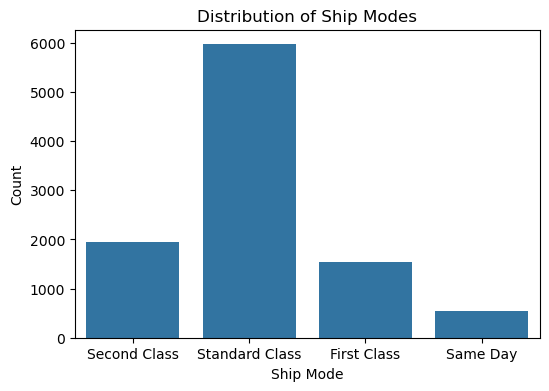

In [33]:
plt.figure(figsize=(6,4))
sns.countplot(x='Ship Mode', data=df)
plt.title('Distribution of Ship Modes')
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.show()

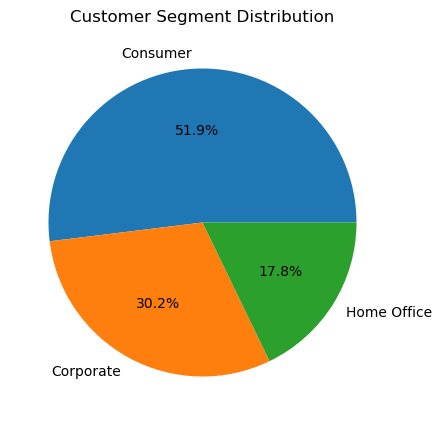

In [34]:
df['Segment'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', figsize=(5,5), title='Customer Segment Distribution')
plt.ylabel('')
plt.show()

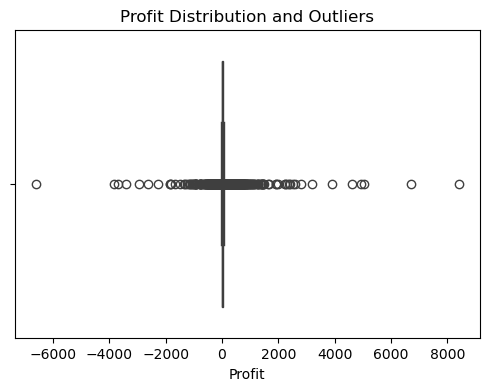

In [35]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Profit'])
plt.title('Profit Distribution and Outliers')
plt.show()

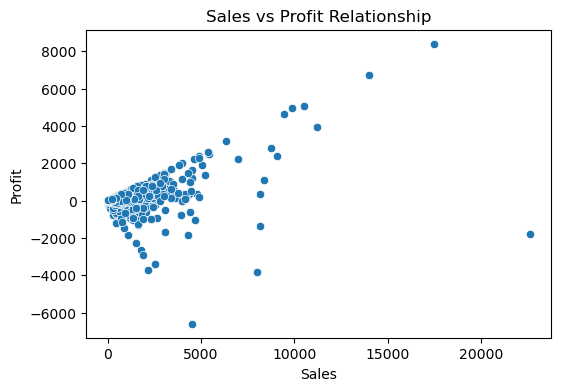

In [36]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Sales vs Profit Relationship')
plt.show()

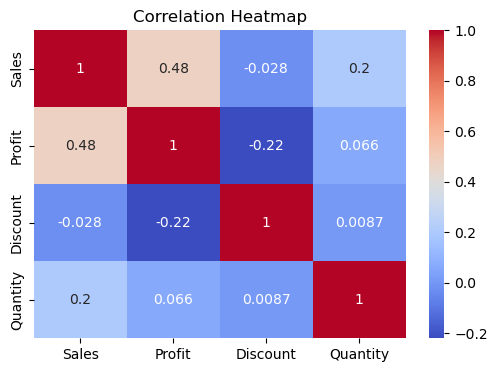

In [37]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Sales','Profit','Discount','Quantity']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
sns.pairplot(df[['Sales','Profit','Discount','Quantity']])
plt.show()